In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/brisbane_water_quality.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
data.head()


First few rows of the dataset:


,Timestamp,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Chlorophyll [quality],Temperature,Temperature [quality],Dissolved Oxygen,Dissolved Oxygen [quality],Dissolved Oxygen (%Saturation),Dissolved Oxygen (%Saturation) [quality],pH,pH [quality],Salinity,Salinity [quality],Specific Conductance,Specific Conductance [quality],Turbidity,Turbidity [quality]
0,2023-08-04 23:00:00,1468,4.834,73.484,1.621,NaN,20.018,NaN,7.472,NaN,101.175,NaN,8.176,NaN,35.215,NaN,53.262,NaN,2.068,NaN
1,2023-08-04 23:30:00,1469,2.544,106.424,1.959,NaN,19.986,NaN,7.455,NaN,100.884,NaN,8.175,NaN,35.209,NaN,53.254,NaN,1.994,NaN
2,2023-08-04 23:00:00,1470,1.260,156.755,1.620,NaN,20.001,NaN,7.430,NaN,100.571,NaN,8.171,NaN,35.207,NaN,53.252,NaN,2.030,NaN
3,2023-08-04 23:30:00,1471,0.760,281.754,1.761,NaN,19.983,NaN,7.419,NaN,100.398,NaN,8.171,NaN,35.211,NaN,53.257,NaN,1.973,NaN
4,2023-08-04 23:00:00,1472,3.397,244.637,1.635,NaN,19.986,NaN,7.429,NaN,100.538,NaN,8.171,NaN,35.208,NaN,53.253,NaN,1.944,NaN


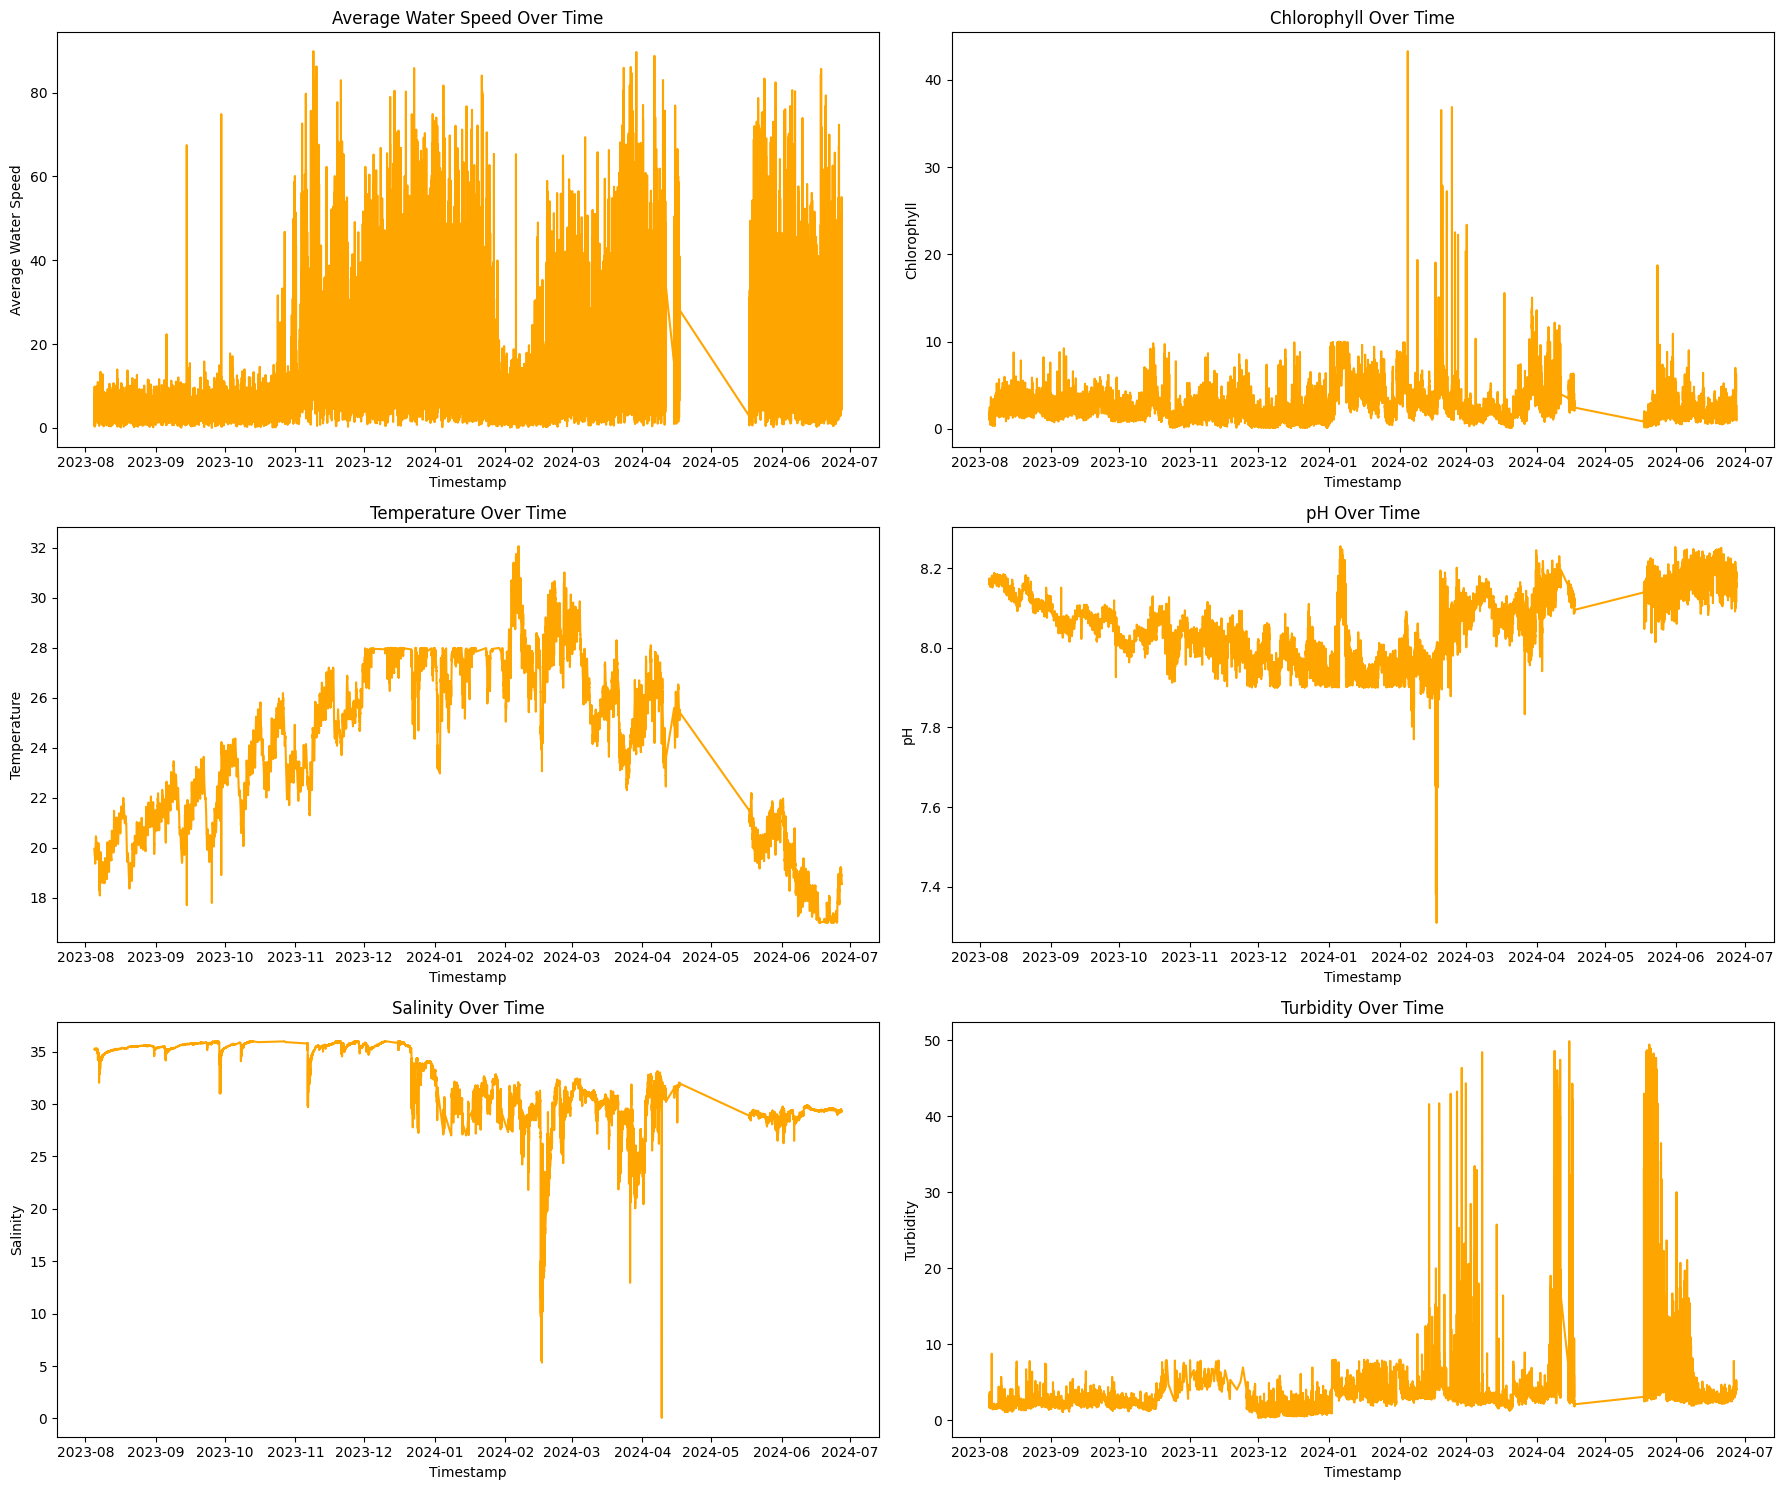

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'Timestamp' column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Plot the time series of various parameters
fig, ax = plt.subplots(3, 2, figsize=(18, 15))

# Average Water Speed Over Time
sns.lineplot(x='Timestamp', y='Average Water Speed', data=data, ax=ax[0, 0], color='orange')
ax[0, 0].set_title('Average Water Speed Over Time')

# Chlorophyll Over Time
sns.lineplot(x='Timestamp', y='Chlorophyll', data=data, ax=ax[0, 1], color='orange')
ax[0, 1].set_title('Chlorophyll Over Time')

# Temperature Over Time
sns.lineplot(x='Timestamp', y='Temperature', data=data, ax=ax[1, 0], color='orange')
ax[1, 0].set_title('Temperature Over Time')

# pH Over Time
sns.lineplot(x='Timestamp', y='pH', data=data, ax=ax[1, 1], color='orange')
ax[1, 1].set_title('pH Over Time')

# Salinity Over Time
sns.lineplot(x='Timestamp', y='Salinity', data=data, ax=ax[2, 0], color='orange')
ax[2, 0].set_title('Salinity Over Time')

# Turbidity Over Time
sns.lineplot(x='Timestamp', y='Turbidity', data=data, ax=ax[2, 1], color='orange')
ax[2, 1].set_title('Turbidity Over Time')

plt.tight_layout()
plt.show()


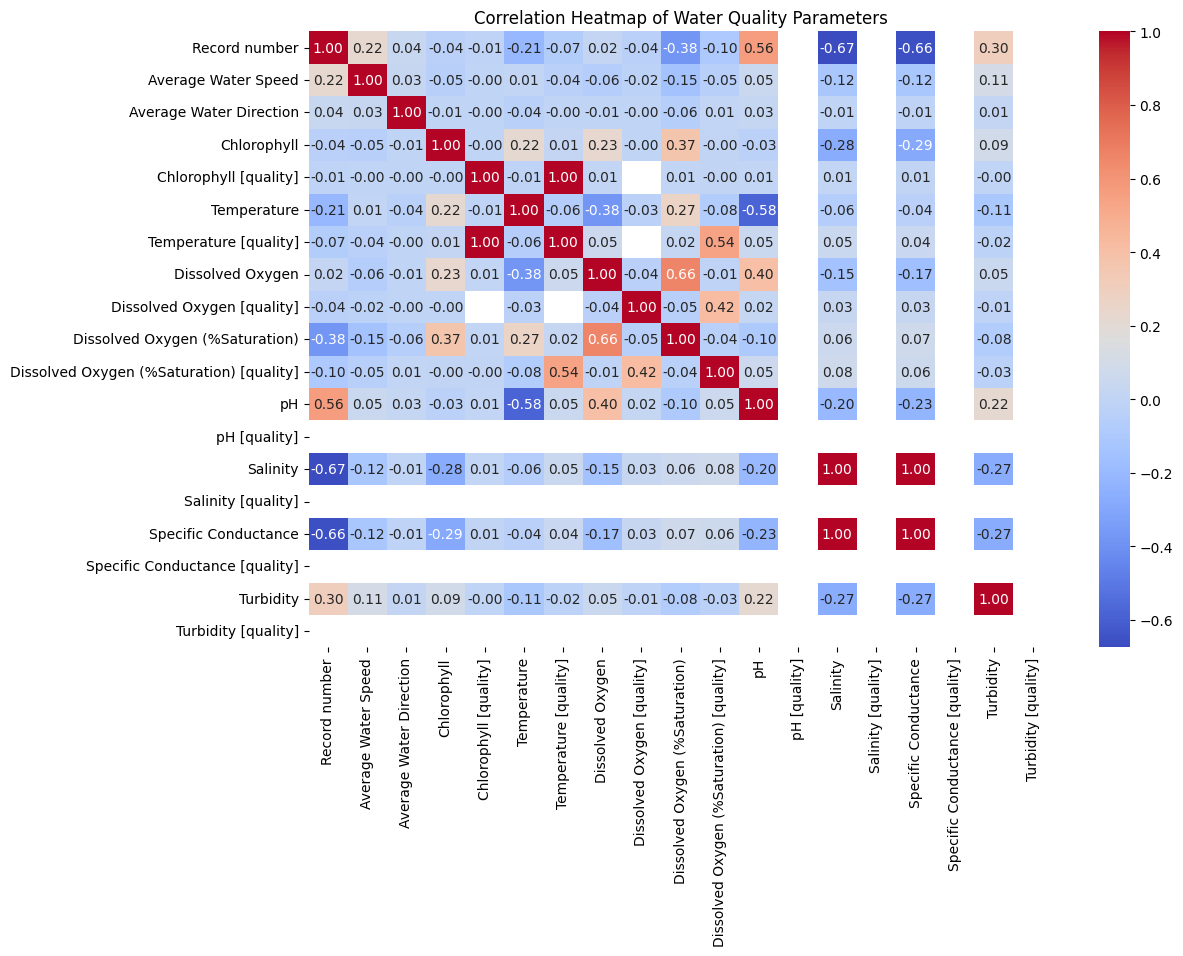

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Water Quality Parameters")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Select features and target variable
features = ['Average Water Speed', 'Average Water Direction', 'Temperature', 'Dissolved Oxygen', 'Dissolved Oxygen (%Saturation)', 'pH', 'Salinity', 'Specific Conductance', 'Turbidity']
target = 'Chlorophyll'

# Drop rows with missing values in the selected columns
data_clean = data.dropna(subset=features + [target])

# Separate features and target variable
X = data_clean[features]
y = data_clean[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 2.6876324319663722
R-squared (R²): 0.24209935479272904


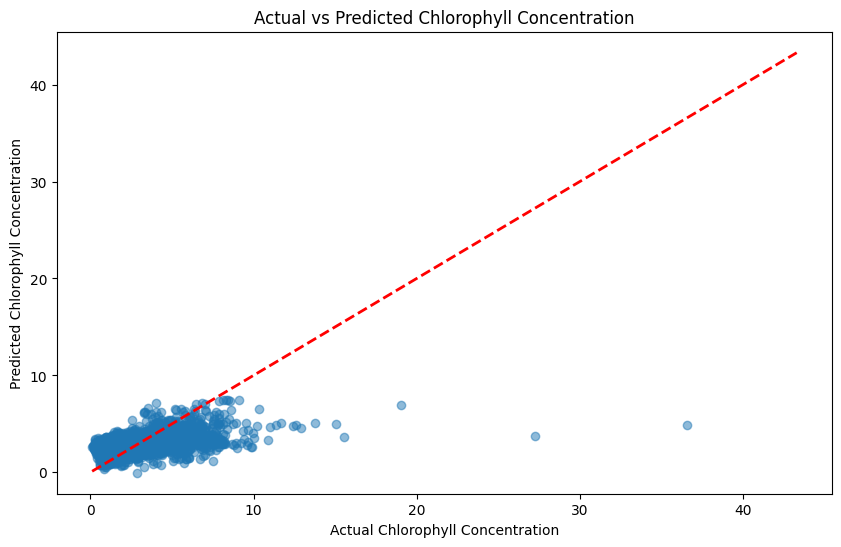

In [ ]:
# Scatter plot of actual vs predicted chlorophyll concentrations
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Chlorophyll Concentration")
plt.ylabel("Predicted Chlorophyll Concentration")
plt.title("Actual vs Predicted Chlorophyll Concentration")
plt.show()
